In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import wandb
import pandas as pd
import re

In [2]:
def clean_switch(df):
    df = df[df['State'] == 'finished']

    patterns = ['experts$', 'effective_l0$', 'mse_loss$', 'frac_recovered$', 'loss_original$', 'loss_reconstructed$', 'frac_recovered$']
    filtered_columns = df.columns[df.columns.str.contains('|'.join(patterns))]
    df = df[filtered_columns]
    df.columns = [re.split(r'[./]', col)[-1] for col in df.columns]
    
    l0 = df["effective_l0"].to_numpy().flatten()
    mse_loss = df["mse_loss"].to_numpy().flatten()
    experts = df["experts"].to_numpy().flatten()
    loss_original = df["loss_original"].to_numpy().flatten()
    loss_reconstructed = df["loss_reconstructed"].to_numpy().flatten()
    frac_recovered = df["frac_recovered"].to_numpy().flatten()
    delta_ce = loss_reconstructed - loss_original

    data = np.array([experts, l0, mse_loss, frac_recovered, delta_ce]).T
    df = pd.DataFrame(data, columns=['experts', 'l0', 'mse_loss', 'frac_recovered', 'delta_ce'])
    df = df.sort_values(by='l0')
    return df

In [3]:
df_relu = pd.read_csv("primary-relu-clean.csv")
df_gated = pd.read_csv("primary-gated-clean.csv")
df_topk = pd.read_csv("primary-topk-clean.csv")

In [4]:
df_switch = pd.read_csv("primary-switch-fast.csv")
df_switch = clean_switch(df_switch)

In [5]:
df_switch16 = df_switch[df_switch['experts'] == 16]
df_switch32 = df_switch[df_switch['experts'] == 32]
df_switch64 = df_switch[df_switch['experts'] == 64]
df_switch128 = df_switch[df_switch['experts'] == 128]

In [6]:
df_switch_flop = pd.read_csv('primary-switch-flop.csv')
df_switch_flop = clean_switch(df_switch_flop)

In [7]:
df_switch_flop2 = df_switch_flop[df_switch_flop['experts'] == 2]
df_switch_flop4 = df_switch_flop[df_switch_flop['experts'] == 4]
df_switch_flop8 = df_switch_flop[df_switch_flop['experts'] == 8]

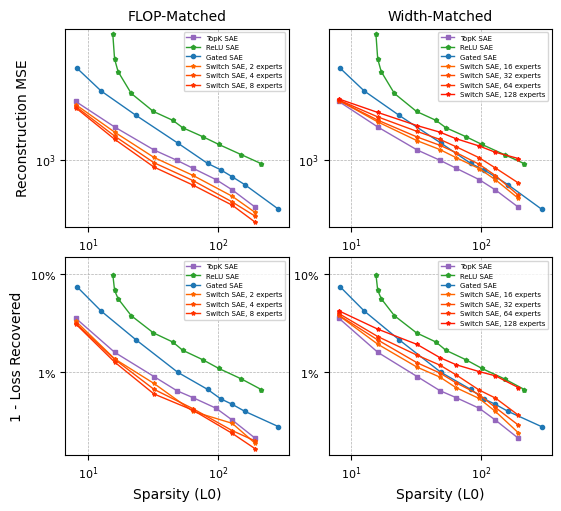

In [35]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(5.5, 5))

ms = 3
lw = 1

# ---- Right Plot ----
ax1 = plt.subplot(2, 2, 2)

ax1.plot(df_topk["l0"], df_topk["mse_loss"], 's-', label='TopK SAE', color='C4', ms = ms, lw=lw)
ax1.plot(df_relu["l0"], df_relu["mse_loss"], 'p-', label='ReLU SAE', color='#2ca02c', ms = ms, lw=lw)
ax1.plot(df_gated["l0"], df_gated["mse_loss"], 'o-', label='Gated SAE', color='#1f77b4', ms = ms, lw=lw)

ax1.plot(df_switch16["l0"], df_switch16["mse_loss"], '*-', label='Switch SAE, 16 experts', color=plt.cm.autumn(0.4), ms = ms, lw=lw)
ax1.plot(df_switch32["l0"], df_switch32["mse_loss"], '*-', label='Switch SAE, 32 experts', color=plt.cm.autumn(0.3), ms = ms, lw=lw)
ax1.plot(df_switch64["l0"], df_switch64["mse_loss"], '*-', label='Switch SAE, 64 experts', color=plt.cm.autumn(0.2), ms = ms, lw=lw)
ax1.plot(df_switch128["l0"], df_switch128["mse_loss"], '*-', label='Switch SAE, 128 experts', color=plt.cm.autumn(0.1), ms = ms, lw=lw)

# Setting scales and limits
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim(9e11, None)
ax1.set_ylim(4e2, 6e3)
#ax1.set_yticks([1e3, 2e3, 3e3, 4e3])
#ax1.set_yticklabels([r"$10^3$", r"$2$", r"$3$", r"$4$"])

ax1.legend(loc='upper right', prop={'size': 5})

# Optionally, adjust tick label size
ax1.tick_params(axis='y', labelsize=8)
ax1.tick_params(axis='x', labelsize=8)

# Labels
#ax1.set_xlabel("Sparsity (L0)", fontsize=10)
#ax1.set_ylabel('Reconstruction MSE', fontsize=10)

# Optional: Remove minor ticks
ax1.minorticks_off()

ax1.set_title("Width-Matched", fontsize=10)

ax1.grid(True, which="both", ls="--", linewidth=0.5)

# ---- Left Plot ----
ax2 = plt.subplot(2, 2, 1)

# Plotting
ax2.plot(df_topk["l0"], df_topk["mse_loss"], 's-', label='TopK SAE', color='C4', ms=ms, lw=lw)
ax2.plot(df_relu["l0"], df_relu["mse_loss"], 'p-', label='ReLU SAE', color='#2ca02c', ms=ms, lw=lw)
ax2.plot(df_gated["l0"], df_gated["mse_loss"], 'o-', label='Gated SAE', color='#1f77b4', ms=ms, lw=lw)

ax2.plot(df_switch_flop2["l0"], df_switch_flop2["mse_loss"], '*-', label='Switch SAE, 2 experts', color=plt.cm.autumn(0.4), ms=ms, lw=lw)
ax2.plot(df_switch_flop4["l0"], df_switch_flop4["mse_loss"], '*-', label='Switch SAE, 4 experts', color=plt.cm.autumn(0.3), ms=ms, lw=lw)
ax2.plot(df_switch_flop8["l0"], df_switch_flop8["mse_loss"], '*-', label='Switch SAE, 8 experts', color=plt.cm.autumn(0.2), ms=ms, lw=lw)


# Setting scales
ax2.set_xscale('log')
ax2.set_yscale('log')

# add y tick labels manually
#ax2.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
#ax2.set_yticklabels([r"$90\%$", r"$92\%$", r"$94\%$", r"$96\%$", r"$98\%$", r"$100\%$"])
#ax2.set_ylim(8.5e2, 4e3)

ax2.set_ylim(4e2, 6e3)

# Setting tick sizes
ax2.tick_params(axis='both', labelsize=8)

# Labels
#ax2.set_xlabel('Sparsity (L0)', fontsize=10)
# ax2.set_ylabel('Loss Recovered', fontsize=10)  # Uncomment if ylabel is desired

ax2.set_title("FLOP-Matched", fontsize=10)
ax2.set_ylabel('Reconstruction MSE', fontsize=10)

ax2.minorticks_off()

# Grid and legend
ax2.grid(True, which="both", ls="--", linewidth=0.5)
ax2.legend(loc='upper right', prop={'size': 5})

# ---- Right Plot ----
ax3 = plt.subplot(2, 2, 4)

ax3.plot(df_topk["l0"], 1-df_topk["frac_recovered"], 's-', label='TopK SAE', color='C4', ms=ms, lw=lw)
ax3.plot(df_relu["l0"], 1-df_relu["frac_recovered"], 'p-', label='ReLU SAE', color='#2ca02c', ms=ms, lw=lw)
ax3.plot(df_gated["l0"], 1-df_gated["frac_recovered"], 'o-', label='Gated SAE', color='#1f77b4', ms=ms, lw=lw)

ax3.plot(df_switch16["l0"], 1-df_switch16["frac_recovered"], '*-', label='Switch SAE, 16 experts', color=plt.cm.autumn(0.4), ms=ms, lw=lw)
ax3.plot(df_switch32["l0"], 1-df_switch32["frac_recovered"], '*-', label='Switch SAE, 32 experts', color=plt.cm.autumn(0.3), ms=ms, lw=lw)
ax3.plot(df_switch64["l0"], 1-df_switch64["frac_recovered"], '*-', label='Switch SAE, 64 experts', color=plt.cm.autumn(0.2), ms=ms, lw=lw)
ax3.plot(df_switch128["l0"], 1-df_switch128["frac_recovered"], '*-', label='Switch SAE, 128 experts', color=plt.cm.autumn(0.1), ms=ms, lw=lw)

# Setting scales and limits
ax3.set_xscale('log')
ax3.set_yscale('log')
#ax1.set_xlim(9e11, None)
ax3.set_ylim(1.4e-3, 1.5e-1)
ax3.set_yticks([0.01, 0.10])
ax3.set_yticklabels([r"$1\%$", r"$10\%$"])

ax3.legend(loc='upper right', prop={'size': 5})

# Optionally, adjust tick label size
ax3.tick_params(axis='y', labelsize=8)
ax3.tick_params(axis='x', labelsize=8)

# Labels
ax3.set_xlabel("Sparsity (L0)", fontsize=10)


# Optional: Remove minor ticks
ax3.minorticks_off()

#ax3.set_title("Width-Matched", fontsize=10)

ax3.grid(True, which="both", ls="--", linewidth=0.5)

# ---- Left Plot ----
ax4 = plt.subplot(2, 2, 3)

# Plotting
ax4.plot(df_topk["l0"], 1-df_topk["frac_recovered"], 's-', label='TopK SAE', color='C4', ms=ms, lw=lw)
ax4.plot(df_relu["l0"], 1-df_relu["frac_recovered"], 'p-', label='ReLU SAE', color='#2ca02c', ms=ms, lw=lw)
ax4.plot(df_gated["l0"], 1-df_gated["frac_recovered"], 'o-', label='Gated SAE', color='#1f77b4', ms=ms, lw=lw)

ax4.plot(df_switch_flop2["l0"], 1-df_switch_flop2["frac_recovered"], '*-', label='Switch SAE, 2 experts', color=plt.cm.autumn(0.4), ms=ms, lw=lw)
ax4.plot(df_switch_flop4["l0"], 1-df_switch_flop4["frac_recovered"], '*-', label='Switch SAE, 4 experts', color=plt.cm.autumn(0.3), ms=ms, lw=lw)
ax4.plot(df_switch_flop8["l0"], 1-df_switch_flop8["frac_recovered"], '*-', label='Switch SAE, 8 experts', color=plt.cm.autumn(0.2), ms=ms, lw=lw)


# Setting scales
ax4.set_xscale('log')
ax4.set_yscale('log')

# add y tick labels manually
#ax2.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
#ax2.set_yticklabels([r"$90\%$", r"$92\%$", r"$94\%$", r"$96\%$", r"$98\%$", r"$100\%$"])
#ax2.set_ylim(8.5e2, 4e3)
ax4.set_ylim(1.4e-3, 1.5e-1)
ax4.set_yticks([0.01, 0.10])
ax4.set_yticklabels([r"$1\%$", r"$10\%$"])
#ax4.set_yticks([0.00, 0.02, 0.04, 0.06, 0.08, 0.1])
#ax4.set_yticklabels([r"$0\%$", r"$2\%$", r"$4\%$", r"$6\%$", r"$8\%$", r"$10\%$"])

#ax2.set_ylim(4e2, 6e3)

# Setting tick sizes
ax4.tick_params(axis='both', labelsize=8)

# Labels
ax4.set_xlabel('Sparsity (L0)', fontsize=10)
ax4.set_ylabel('1 - Loss Recovered', fontsize=10)
# ax2.set_ylabel('Loss Recovered', fontsize=10)  # Uncomment if ylabel is desired

#ax4.set_title("FLOP-Matched", fontsize=10)

ax4.minorticks_off()

# Grid and legend
ax4.grid(True, which="both", ls="--", linewidth=0.5)
ax4.legend(loc='upper right', prop={'size': 5})


# Adjust layout
plt.tight_layout(pad=0.3)
# plt.subplots_adjust(wspace=0.2)
# plt.subplots_adjust(left=0.1, right=0.8, top=0.87, bottom=0.1)

plt.savefig("switch_sae_pareto.pdf")

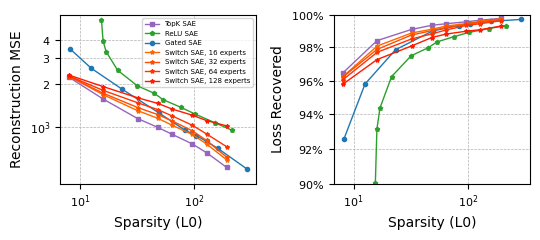

In [19]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(5.5, 2.5))

ms = 3
lw = 1

# ---- Right Plot ----
ax1 = plt.subplot(1, 2, 1)

ax1.plot(df_topk["l0"], df_topk["mse_loss"], 's-', label='TopK SAE', color='C4', ms = ms, lw=lw)
ax1.plot(df_relu["l0"], df_relu["mse_loss"], 'p-', label='ReLU SAE', color='#2ca02c', ms = ms, lw=lw)
ax1.plot(df_gated["l0"], df_gated["mse_loss"], 'o-', label='Gated SAE', color='#1f77b4', ms = ms, lw=lw)

ax1.plot(df_switch16["l0"], df_switch16["mse_loss"], '*-', label='Switch SAE, 16 experts', color=plt.cm.autumn(0.4), ms = ms, lw=lw)
ax1.plot(df_switch32["l0"], df_switch32["mse_loss"], '*-', label='Switch SAE, 32 experts', color=plt.cm.autumn(0.3), ms = ms, lw=lw)
ax1.plot(df_switch64["l0"], df_switch64["mse_loss"], '*-', label='Switch SAE, 64 experts', color=plt.cm.autumn(0.2), ms = ms, lw=lw)
ax1.plot(df_switch128["l0"], df_switch128["mse_loss"], '*-', label='Switch SAE, 128 experts', color=plt.cm.autumn(0.1), ms = ms, lw=lw)

# Setting scales and limits
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim(9e11, None)
ax1.set_ylim(4e2, 6e3)
ax1.set_yticks([1e3, 2e3, 3e3, 4e3])
ax1.set_yticklabels([r"$10^3$", r"$2$", r"$3$", r"$4$"])

ax1.legend(loc='upper right', prop={'size': 5})

# Optionally, adjust tick label size
ax1.tick_params(axis='y', labelsize=8)
ax1.tick_params(axis='x', labelsize=8)

# Labels
ax1.set_xlabel("Sparsity (L0)", fontsize=10)
#ax1.set_ylabel('Reconstruction MSE', fontsize=10)

# Optional: Remove minor ticks
ax1.minorticks_off()

#ax1.set_title("Width-Matched", fontsize=10)
ax1.set_ylabel('Reconstruction MSE', fontsize=10)

ax1.grid(True, which="both", ls="--", linewidth=0.5)

# ---- Left Plot ----
ax2 = plt.subplot(1, 2, 2)

# Plotting
ax2.plot(df_topk["l0"], df_topk["frac_recovered"], 's-', label='TopK SAE', color='C4', ms = ms, lw=lw)
ax2.plot(df_relu["l0"], df_relu["frac_recovered"], 'p-', label='ReLU SAE', color='#2ca02c', ms = ms, lw=lw)
ax2.plot(df_gated["l0"], df_gated["frac_recovered"], 'o-', label='Gated SAE', color='#1f77b4', ms = ms, lw=lw)

ax2.plot(df_switch16["l0"], df_switch16["frac_recovered"], '*-', label='Switch SAE, 16 experts', color=plt.cm.autumn(0.4), ms = ms, lw=lw)
ax2.plot(df_switch32["l0"], df_switch32["frac_recovered"], '*-', label='Switch SAE, 32 experts', color=plt.cm.autumn(0.3), ms = ms, lw=lw)
ax2.plot(df_switch64["l0"], df_switch64["frac_recovered"], '*-', label='Switch SAE, 64 experts', color=plt.cm.autumn(0.2), ms = ms, lw=lw)
ax2.plot(df_switch128["l0"], df_switch128["frac_recovered"], '*-', label='Switch SAE, 128 experts', color=plt.cm.autumn(0.1), ms = ms, lw=lw)

# Setting scales
ax2.set_xscale('log')
ax2.set_yscale('log')

# add y tick labels manually
ax2.set_ylim(0.9, 1.0)
ax2.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
ax2.set_yticklabels([r"$90\%$", r"$92\%$", r"$94\%$", r"$96\%$", r"$98\%$", r"$100\%$"])

# Setting tick sizes
ax2.tick_params(axis='both', labelsize=8)

# Labels
ax2.set_xlabel('Sparsity (L0)', fontsize=10)
ax2.set_ylabel('Loss Recovered', fontsize=10)  # Uncomment if ylabel is desired

#ax2.set_title("FLOP-Matched", fontsize=10)
#ax2.set_ylabel('Reconstruction MSE', fontsize=10)

plt.tight_layout()
ax2.minorticks_off()

# Grid and legend
ax2.grid(True, which="both", ls="--", linewidth=0.5)
plt.savefig("switch_sae_pareto_width.pdf")
#ax2.legend(loc='lower right', prop={'size': 5})

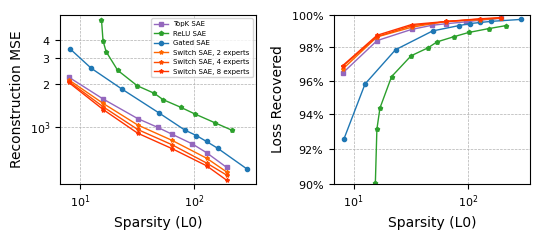

In [20]:
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(5.5, 2.5))

ms = 3
lw = 1

# ---- Right Plot ----
ax1 = plt.subplot(1, 2, 1)

ax1.plot(df_topk["l0"], df_topk["mse_loss"], 's-', label='TopK SAE', color='C4', ms = ms, lw=lw)
ax1.plot(df_relu["l0"], df_relu["mse_loss"], 'p-', label='ReLU SAE', color='#2ca02c', ms = ms, lw=lw)
ax1.plot(df_gated["l0"], df_gated["mse_loss"], 'o-', label='Gated SAE', color='#1f77b4', ms = ms, lw=lw)

ax1.plot(df_switch_flop2["l0"], df_switch_flop2["mse_loss"], '*-', label='Switch SAE, 2 experts', color=plt.cm.autumn(0.4), ms=ms, lw=lw)
ax1.plot(df_switch_flop4["l0"], df_switch_flop4["mse_loss"], '*-', label='Switch SAE, 4 experts', color=plt.cm.autumn(0.3), ms=ms, lw=lw)
ax1.plot(df_switch_flop8["l0"], df_switch_flop8["mse_loss"], '*-', label='Switch SAE, 8 experts', color=plt.cm.autumn(0.2), ms=ms, lw=lw)

# Setting scales and limits
ax1.set_xscale('log')
ax1.set_yscale('log')
#ax1.set_xlim(9e11, None)
ax1.set_ylim(4e2, 6e3)
ax1.set_yticks([1e3, 2e3, 3e3, 4e3])
ax1.set_yticklabels([r"$10^3$", r"$2$", r"$3$", r"$4$"])

ax1.legend(loc='upper right', prop={'size': 5})

# Optionally, adjust tick label size
ax1.tick_params(axis='y', labelsize=8)
ax1.tick_params(axis='x', labelsize=8)

# Labels
ax1.set_xlabel("Sparsity (L0)", fontsize=10)
#ax1.set_ylabel('Reconstruction MSE', fontsize=10)

# Optional: Remove minor ticks
ax1.minorticks_off()

#ax1.set_title("Width-Matched", fontsize=10)
ax1.set_ylabel('Reconstruction MSE', fontsize=10)

ax1.grid(True, which="both", ls="--", linewidth=0.5)

# ---- Left Plot ----
ax2 = plt.subplot(1, 2, 2)

# Plotting
ax2.plot(df_topk["l0"], df_topk["frac_recovered"], 's-', label='TopK SAE', color='C4', ms = ms, lw=lw)
ax2.plot(df_relu["l0"], df_relu["frac_recovered"], 'p-', label='ReLU SAE', color='#2ca02c', ms = ms, lw=lw)
ax2.plot(df_gated["l0"], df_gated["frac_recovered"], 'o-', label='Gated SAE', color='#1f77b4', ms = ms, lw=lw)

ax2.plot(df_switch_flop2["l0"], df_switch_flop2["frac_recovered"], '*-', label='Switch SAE, 2 experts', color=plt.cm.autumn(0.4), ms=ms, lw=lw)
ax2.plot(df_switch_flop4["l0"], df_switch_flop4["frac_recovered"], '*-', label='Switch SAE, 4 experts', color=plt.cm.autumn(0.3), ms=ms, lw=lw)
ax2.plot(df_switch_flop8["l0"], df_switch_flop8["frac_recovered"], '*-', label='Switch SAE, 8 experts', color=plt.cm.autumn(0.2), ms=ms, lw=lw)

# Setting scales
ax2.set_xscale('log')
ax2.set_yscale('log')

# add y tick labels manually
ax2.set_ylim(0.9, 1.0)
ax2.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1.0])
ax2.set_yticklabels([r"$90\%$", r"$92\%$", r"$94\%$", r"$96\%$", r"$98\%$", r"$100\%$"])

# Setting tick sizes
ax2.tick_params(axis='both', labelsize=8)

# Labels
ax2.set_xlabel('Sparsity (L0)', fontsize=10)
ax2.set_ylabel('Loss Recovered', fontsize=10)  # Uncomment if ylabel is desired

#ax2.set_title("FLOP-Matched", fontsize=10)
#ax2.set_ylabel('Reconstruction MSE', fontsize=10)

plt.tight_layout()
ax2.minorticks_off()

# Grid and legend
ax2.grid(True, which="both", ls="--", linewidth=0.5)
plt.savefig("switch_sae_pareto_flop.pdf")
#ax2.legend(loc='lower right', prop={'size': 5})